<a href="https://colab.research.google.com/github/INA-95/Customer-Analysis/blob/main/walmart_customer_behavior_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [91]:
# library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install kmodes
from kmodes.kmodes import KModes
from tqdm import tqdm

In [92]:
file_path = "/content/drive/MyDrive/Side_Project/side_project/Walmart/walmart_data.csv"
df = pd.read_csv(file_path)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
# Meaning of every single row

# User_ID
## Every user made a multiple purchase

df['User_ID'].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [ ]:
# Product_ID
# Is there any user who made a purchase same product?

for user_id, sub in df.groupby('User_ID'):
    cnt_purchase = sub.groupby('Product_ID')['Product_ID'].count().rename_axis('product_id').reset_index()
    cnt_purchase = cnt_purchase.rename(columns = {'Product_ID' : 'num_of_purchase'})
    for val in cnt_purchase['num_of_purchase']:
        if val > 1:
            print(cnt_purchase['product_id'])
print('No one bought a same product')

No one bought a same product


In [ ]:
# Every product was sold at least one time

for product_id, sub in df.groupby('Product_ID'):
    print(product_id, ":", sub['User_ID'].count())

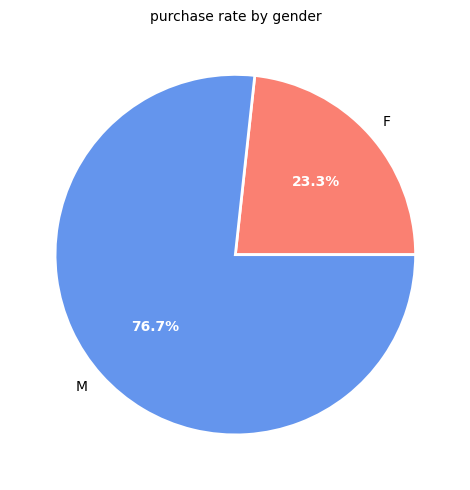

In [ ]:
gender_purchase = df.groupby('Gender')['Purchase'].sum().reset_index()
gender_purchase

genders = [gender for gender in gender_purchase['Gender']]
purchase_amt = [amt for amt in gender_purchase['Purchase']]

fig, ax = plt.subplots(figsize = (5, 5))
colors = ['salmon', 'cornflowerblue']

patches, texts, pcts = ax.pie(
    purchase_amt, labels = genders, autopct = '%1.1f%%',
    wedgeprops = {'linewidth' : 2.0, 'edgecolor' : 'white'},
    textprops = {'size': 'medium'},
    colors = colors)

plt.setp(pcts, color = 'white', fontweight = 'bold')
ax.set_title('purchase rate by gender', fontsize = '10')
plt.tight_layout()

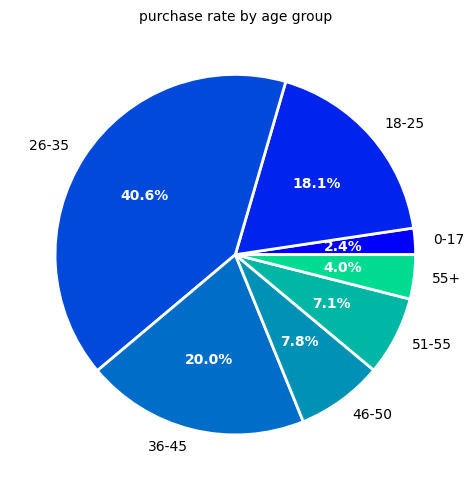

In [ ]:
m_df = df[df['Gender'] == 'M']
age_purchase = m_df.groupby('Age')['Purchase'].sum().reset_index()
ages = [age for age in age_purchase['Age']]
purchase_amt = [amt for amt in age_purchase['Purchase']]

fig, ax = plt.subplots(figsize = (5, 5))
theme = plt.get_cmap('winter')
ax.set_prop_cycle("color", [theme(1. * i / len(ages)) for i in range(len(ages))])

patches, texts, pcts = ax.pie(
    purchase_amt, labels = ages, autopct = '%1.1f%%',
    wedgeprops = {'linewidth' : 2.0, 'edgecolor' : 'white'},
    textprops = {'size': 'medium'})

plt.setp(pcts, color = 'white', fontweight = 'bold')
ax.set_title('purchase rate by age group', fontsize = '10')
plt.tight_layout()

In [ ]:
# Popular product by age group

# 26-35
purchase_26_35 = m_df[m_df['Age'] == '26-35'].groupby('Product_ID')['Purchase'].sum().reset_index()
purchase_26_35 = purchase_26_35.sort_values(by = 'Purchase', ascending = False)[:10].reset_index()
purchase_26_35[['Product_ID', 'Purchase']]

,Product_ID,Purchase
0,P00025442,8605328
1,P00110742,8488003
2,P00184942,7936977
3,P00237542,7864700
4,P00057642,7728454
5,P00112142,7491531
6,P00110942,7462648
7,P00255842,7455002
8,P00028842,7339219
9,P00059442,7224104


[Text(0.5, 1.0, 'Purchase rate by Occupation')]

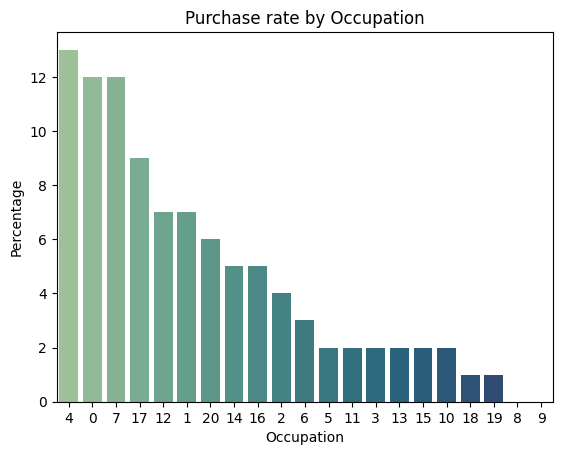

In [ ]:
# How's the men's purchase distribution by occupation?

occu_purchase = m_df.groupby('Occupation')['Purchase'].sum().reset_index()
occu_purchase['Percentage'] = round((occu_purchase['Purchase'] / occu_purchase['Purchase'].sum()) * 100, 0)

occu_purchase.sort_values('Percentage')

sns.barplot(x = 'Occupation', y = 'Percentage', data = occu_purchase, palette = "crest",
            order = occu_purchase.sort_values('Percentage', ascending = False).Occupation).set(title = 'Purchase rate by Occupation')


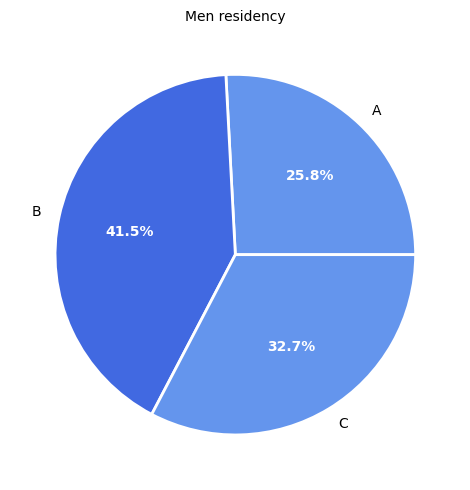

In [ ]:
# Where does men live?

city_purchase = m_df.groupby('City_Category')['Purchase'].sum().reset_index()
citys = [city for city in city_purchase['City_Category']]
amt = [amt for amt in city_purchase['Purchase']]

fig, ax = plt.subplots(figsize = (5, 5))
colors = ['cornflowerblue', 'royalblue']

patches, texts, pcts = ax.pie(
    amt, labels = citys, autopct = '%1.1f%%',
    wedgeprops = {'linewidth' : 2.0, 'edgecolor' : 'white'},
    textprops = {'size': 'medium'},
    colors = colors)

plt.setp(pcts, color = 'white', fontweight = 'bold')
ax.set_title('Men residency', fontsize = '10')
plt.tight_layout()

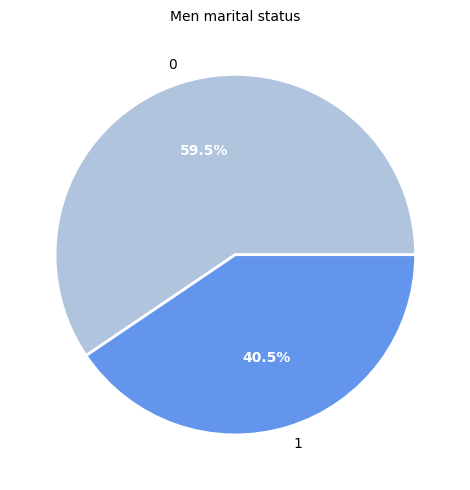

In [ ]:
# Do men get married?

marital_purchase = m_df.groupby('Marital_Status')['Purchase'].sum().reset_index()
marital = [val for val in marital_purchase['Marital_Status']]
amt = [amt for amt in marital_purchase['Purchase']]

fig, ax = plt.subplots(figsize = (5, 5))
colors = ['lightsteelblue', 'cornflowerblue']

patches, texts, pcts = ax.pie(
    amt, labels = marital, autopct = '%1.1f%%',
    wedgeprops = {'linewidth' : 2.0, 'edgecolor' : 'white'},
    textprops = {'size': 'medium'},
    colors = colors)

plt.setp(pcts, color = 'white', fontweight = 'bold')
ax.set_title('Men marital status', fontsize = '10')
plt.tight_layout()

In [ ]:
# k-mode clustering

total_purchase_by_user_id = m_df.groupby('User_ID')['Purchase'].sum().reset_index().rename(columns = {'Purchase' : 'total_purchase'})
total_purchase_by_user_id.head()

,User_ID,total_purchase
0,1000002,810472
1,1000003,341635
2,1000004,206468
3,1000005,821001
4,1000007,234668


In [ ]:
total_purchase_by_user = m_df.merge(total_purchase_by_user_id, how = 'inner', on = 'User_ID')
total_purchase_by_user = total_purchase_by_user[['User_ID', 'Age', 'Occupation','City_Category', 'Marital_Status', 'total_purchase']].drop_duplicates()
total_purchase_by_user = total_purchase_by_user.reset_index(drop = True)
total_purchase_by_user.head()

4225


In [ ]:
total_purchase_by_user['Occupation'] = total_purchase_by_user['Occupation'].apply(lambda x : str(x))
total_purchase_by_user['Marital_Status'] = total_purchase_by_user['Marital_Status'].apply(lambda x : str(x))

In [ ]:
total_purchase_by_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4225 entries, 0 to 4224
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   User_ID         4225 non-null   int64 
 1   Age             4225 non-null   object
 2   Occupation      4225 non-null   object
 3   City_Category   4225 non-null   object
 4   Marital_Status  4225 non-null   object
 5   total_purchase  4225 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 198.2+ KB


In [119]:
drop_index = total_purchase_by_user[total_purchase_by_user['total_purchase'] >= 8000000].index
drop_index

Int64Index([1084, 2781], dtype='int64')

In [120]:
total_purchase_by_user.drop(drop_index, inplace = True)
total_purchase_by_user.head()

,User_ID,Age,Occupation,City_Category,Marital_Status,total_purchase
0,1000002,55+,16,C,0,810472
1,1000003,26-35,15,A,0,341635
2,1000004,46-50,7,B,1,206468
3,1000005,26-35,20,A,1,821001
4,1000007,36-45,1,B,1,234668


In [121]:
target_df = total_purchase_by_user[['Age', 'Occupation', 'City_Category', 'Marital_Status']]
target_df.head()

,Age,Occupation,City_Category,Marital_Status
0,55+,16,C,0
1,26-35,15,A,0
2,46-50,7,B,1
3,26-35,20,A,1
4,36-45,1,B,1


  0%|          | 0/4 [00:00<?, ?it/s]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 10113.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 10113.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 10113.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 10113.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...


 25%|██▌       | 1/4 [00:01<00:04,  1.38s/it]

Run 5, iteration: 1/100, moves: 0, cost: 10113.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1063, cost: 8667.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 258, cost: 9333.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 8365.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 98, cost: 9291.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 560, cost: 8363.0
Run 5, iteration: 2/100, moves: 70, cost: 8363.0
Best run was number 5


 50%|█████     | 2/4 [00:03<00:03,  1.66s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 420, cost: 7808.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 180, cost: 8164.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 299, cost: 8239.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1297, cost: 7939.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 695, cost: 7826.0
Run 5, iteration: 2/100, moves: 79, cost: 7826.0
Best run was number 1


 75%|███████▌  | 3/4 [00:05<00:01,  2.00s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 706, cost: 7984.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 543, cost: 6994.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1862, cost: 7542.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 949, cost: 6879.0
Run 4, iteration: 2/100, moves: 61, cost: 6879.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...


100%|██████████| 4/4 [00:07<00:00,  1.94s/it]

Run 5, iteration: 1/100, moves: 525, cost: 7598.0
Run 5, iteration: 2/100, moves: 105, cost: 7598.0
Best run was number 4


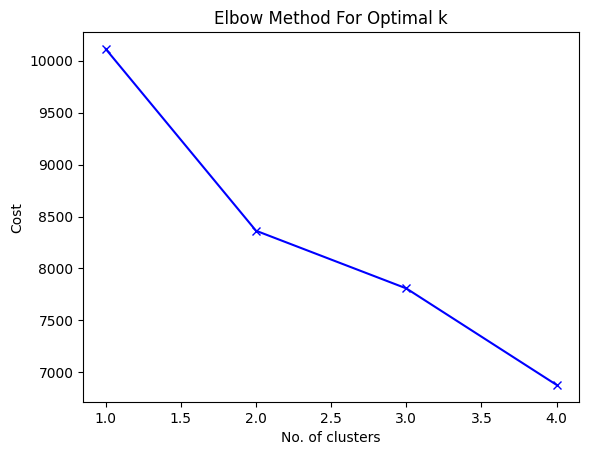

In [122]:
data = target_df.values
cost = []
K = range(1, 5)
for num_clusters in tqdm(list(K)):
    kmode = KModes(n_clusters = num_clusters, init = "random", n_init = 5, verbose = 1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [123]:
kmode = KModes(n_clusters = 4, init = "random", n_init = 5, verbose = 1)
clusters = kmode.fit_predict(data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 613, cost: 7315.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1455, cost: 6798.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1148, cost: 7377.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 668, cost: 7221.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 373, cost: 6948.0
Best run was number 2


In [124]:
# concat

result = np.insert(total_purchase_by_user.values, 6, clusters, axis = 1)

In [125]:
result = pd.DataFrame(result, columns = ['user_id', 'age', 'occupation', 'city_category', 'marital_status', 'total_purchase', 'cluster'])
result.head()

,user_id,age,occupation,city_category,marital_status,total_purchase,cluster
0,1000002,55+,16,C,0,810472,3
1,1000003,26-35,15,A,0,341635,2
2,1000004,46-50,7,B,1,206468,0
3,1000005,26-35,20,A,1,821001,1
4,1000007,36-45,1,B,1,234668,0


In [162]:
# age by cluster

result.groupby(['cluster', 'age']).aggregate({'age' : 'count', 'total_purchase' : 'sum'})

age total_purchase
cluster age                      
0       0-17     1        1085469
        18-25   78       58143105
        26-35  129       97700995
        36-45  698      594002487
        46-50  236      202638436
        51-55  240      186010142
        55+    175       97949537
1       0-17     1        1918711
        18-25   10       10593986
        26-35  771      670514468
        46-50   21       21704836
        51-55   16       11783711
        55+      4        1178800
2       0-17    54       49340359
        18-25  105      146054600
        26-35  571      789316352
        36-45  132      176827577
        46-50   47       54133400
        51-55   44       55953539
        55+     40       28454993
3       0-17    84       40182666
        18-25  589      493581142
        26-35   36       22562934
        36-45    3        1763948
        46-50   45       25659867
        51-55   39       23886255
        55+     54       27401280